In [91]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score


import warnings
warnings.filterwarnings("ignore")

 
## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

In [2]:
# logistic, RF, DS

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [63]:
#Read in the csv file and convert to a Pandas dataframe
df_football = pd.read_csv('./final_data.csv')

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [64]:
df_football.head()

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0


In [65]:
df_football.shape

(10754, 22)

## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

In [6]:
df_football.describe()

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
count,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,1.075400e+04,1.075400e+04,10754.000000,10754.000000
mean,181.240353,26.041903,36.407011,0.125554,0.086978,0.189757,0.004666,0.006826,0.131655,0.044881,2470.789381,117.961689,15.826297,1.960759,3.622971e+06,6.152606e+06,2.713223,0.307513
std,6.969818,4.777629,26.526541,0.235585,0.143351,0.432388,0.025232,0.081143,0.442335,0.924437,2021.703271,175.206827,23.383606,3.743936,9.095410e+06,1.338988e+07,0.986356,0.461485
min,156.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,0.000000
25%,176.000000,22.000000,12.000000,0.000000,0.000000,0.053191,0.000000,0.000000,0.000000,0.000000,660.000000,0.000000,0.000000,0.000000,3.000000e+05,4.500000e+05,2.000000,0.000000
50%,181.240353,26.000000,35.000000,0.045969,0.040773,0.150250,0.000000,0.000000,0.000000,0.000000,2101.500000,37.000000,5.000000,1.000000,8.000000e+05,1.500000e+06,3.000000,0.000000
75%,186.000000,29.000000,59.000000,0.172263,0.133136,0.248276,0.000000,0.000000,0.000000,0.000000,3968.000000,181.000000,24.000000,2.000000,3.000000e+06,5.000000e+06,4.000000,1.000000
max,206.000000,43.000000,107.000000,11.250000,4.000000,30.000000,1.000000,6.923077,9.000000,90.000000,9510.000000,2349.000000,339.000000,92.000000,1.800000e+08,2.000000e+08,4.000000,1.000000


In [7]:
df_football.head()

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0


In [66]:
df_football.describe(include=object)

,player,team,name,position
count,10754,10754,10754,10754
unique,10754,374,10584,16
top,/david-de-gea/profil/spieler/59377,Daejeon Hana Citizen,Paulinho,Defender Centre-Back
freq,1,46,6,1821


### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable. 


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

In [9]:
# data is trustworthy; check Kaggle for more info

#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

In [10]:
#data is up to date

#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


In [11]:
#one data source; no need to check

#### 4. Relevance: 
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


In [12]:
df_football.duplicated().sum() # -> there is no duplicate

0

#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [13]:
#Display number missing values per column
df_football.isnull().sum() # there is no nulls

player                 0
team                   0
name                   0
position               0
height                 0
age                    0
appearance             0
goals                  0
assists                0
yellow cards           0
second yellow cards    0
red cards              0
goals conceded         0
clean sheets           0
minutes played         0
days_injured           0
games_injured          0
award                  0
current_value          0
highest_value          0
position_encoded       0
winger                 0
dtype: int64

In [67]:
df_football[(df_football['current_value'] == 0 ) & (df_football['highest_value'] == 0)]

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
406,/sven-botman/profil/spieler/361093,Newcastle United,Sven Botman,Defender Centre-Back,195.000000,23.000000,76,0.041159,0.013720,0.123476,...,0.0,0.0,6560,118,19,4,0,0,2,0
407,/fabian-schar/profil/spieler/135343,Newcastle United,Fabian Schär,Defender Centre-Back,186.000000,31.000000,67,0.045678,0.076129,0.182710,...,0.0,0.0,5911,285,30,3,0,0,2,0
408,/jamaal-lascelles/profil/spieler/183318,Newcastle United,Jamaal Lascelles,Defender Centre-Back,188.000000,29.000000,38,0.068992,0.000000,0.310464,...,0.0,0.0,2609,418,57,2,0,0,2,0
409,/matt-targett/profil/spieler/250478,Newcastle United,Matt Targett,Defender Left-Back,183.000000,27.000000,54,0.023747,0.023747,0.094987,...,0.0,0.0,3790,380,66,0,0,0,2,1
666,/mert-komur/profil/spieler/777005,FC Augsburg,Mert Kömür,midfield-AttackingMidfield,183.000000,17.000000,46,0.268876,0.293319,0.073330,...,0.0,0.0,3682,0,0,0,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10581,/zahi-addis/profil/spieler/1069563,Brisbane Roar,Zahi Addis,Defender Left-Back,181.240353,19.000000,0,0.000000,0.000000,0.000000,...,0.0,0.0,0,0,0,0,0,0,2,1
10586,/james-murphy/profil/spieler/1069560,Brisbane Roar,James Murphy,midfield,181.240353,17.000000,0,0.000000,0.000000,0.000000,...,0.0,0.0,0,0,0,0,0,0,3,0
10587,/riley-gill/profil/spieler/1069561,Brisbane Roar,Riley Gill,midfield,181.240353,26.041903,0,0.000000,0.000000,0.000000,...,0.0,0.0,0,0,0,0,0,0,3,0
10686,/corey-hollman/profil/spieler/890186,Sydney FC,Corey Hollman,midfield-DefensiveMidfield,181.240353,19.000000,1,0.000000,0.000000,0.000000,...,0.0,0.0,3,0,0,0,0,0,3,0


In [68]:
df_football.drop(df_football[df_football['current_value'] == 0 ].index , inplace=True) #drop where current =0

In [16]:
df_football.shape

(10587, 22)

In [69]:
df_football['position_encoded'].value_counts() 

position_encoded
2    3476
3    3039
4    2869
1    1203
Name: count, dtype: int64

In [70]:
df_football['position'].value_counts()

position
Defender Centre-Back          1803
Attack Centre-Forward         1341
Goalkeeper                    1203
midfield-CentralMidfield      1136
midfield-DefensiveMidfield     886
Defender Right-Back            853
Defender Left-Back             796
midfield-AttackingMidfield     761
Attack-RightWinger             712
Attack-LeftWinger              710
midfield-RightMidfield          99
midfield-LeftMidfield           99
Attack-SecondStriker            65
midfield                        58
Attack                          41
Defender                        24
Name: count, dtype: int64

In [71]:
fig = px.scatter(df_football, x='current_value')
fig.show()

In [72]:
df_football[df_football['current_value'] <= 100000000]

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.000000,32.0,104,0.000000,0.000000,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.000000,30.0,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.000000,37.0,4,0.000000,0.000000,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.000000,25.0,82,0.028090,0.056180,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.000000,30.0,63,0.017889,0.017889,0.053667,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10749,/aidan-simmons/profil/spieler/867763,Western Sydney Wanderers,Aidan Simmons,Attack-RightWinger,181.240353,20.0,16,0.175953,0.087977,0.263930,...,0.000000,0.000000,1023,0,0,0,75000,75000,4,1
10750,/kusini-yengi/profil/spieler/708099,Western Sydney Wanderers,Kusini Yengi,Attack Centre-Forward,190.000000,24.0,26,0.372671,0.186335,0.186335,...,0.000000,0.000000,1449,102,18,0,300000,300000,4,0
10751,/nathanael-blair/profil/spieler/1023268,Western Sydney Wanderers,Nathanael Blair,Attack Centre-Forward,181.240353,19.0,20,0.375000,0.000000,0.187500,...,0.000000,0.000000,960,0,0,0,50000,50000,4,0
10752,/zachary-sapsford/profil/spieler/703657,Western Sydney Wanderers,Zachary Sapsford,Attack Centre-Forward,181.240353,20.0,17,0.312139,0.104046,0.000000,...,0.000000,0.000000,865,0,0,0,50000,50000,4,0


In [73]:
df_football = df_football[df_football['current_value'] <= 100000000]

In [22]:
df_football.shape

(10580, 22)

#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [23]:
# check columns types
df_football.dtypes 

player                  object
team                    object
name                    object
position                object
height                 float64
age                    float64
appearance               int64
goals                  float64
assists                float64
yellow cards           float64
second yellow cards    float64
red cards              float64
goals conceded         float64
clean sheets           float64
minutes played           int64
days_injured             int64
games_injured            int64
award                    int64
current_value            int64
highest_value            int64
position_encoded         int64
winger                   int64
dtype: object

In [74]:
df_football['age'] = df_football['age'].astype('int') # change age Dtype

In [75]:
df_football.drop(['player'],axis=1,inplace=True) # -> drop unrelevent column
df_football.drop(['name'],axis=1,inplace=True) # -> drop unrelevent column

In [26]:
fig = px.histogram(
    df_football, 
    x='age', 
    title='Age Distrbution',
    color_discrete_sequence=['lightskyblue']
)

# Show the figure
fig.show()

In [76]:
df_football = df_football[(df_football['age'] <= 35 )] #filter out outliers

In [28]:
df_football.shape

(10259, 20)

In [29]:
fig = px.histogram(
    df_football, 
    x='height', 
    title='Height Distrbution',
    color_discrete_sequence=['lightskyblue']
)

# Show the figure
fig.show()

In [77]:
df_football = df_football[(df_football['height'] >= 165 ) & (df_football['height'] <= 200)]  #filter out outiler

In [31]:
df_football.shape

(10198, 20)

In [32]:
fig = px.histogram(df_football, x='position_encoded',  title='position encoded distrbution',
    color_discrete_sequence=['lightskyblue'], nbins= 10)

fig.show()

In [33]:
fig = px.scatter(df_football, x='appearance', title='Appearancee Distrbution',
    color_discrete_sequence=['lightskyblue'])

fig.show()

In [78]:
df_football = df_football[df_football['appearance'] >= 10] #filter out outliers

In [35]:
df_football.shape

(8160, 20)

In [36]:
fig = px.scatter(df_football, x='minutes played',  color_discrete_sequence=['lightskyblue'])
fig.show()

In [79]:
df_football = df_football[df_football['minutes played'] >= 350 ]

In [80]:
df_football = df_football[df_football['days_injured'] <= 1000 ]

In [39]:
avg_value = df_football.groupby('position')['current_value'].mean().sort_values(ascending=False)
fig = px.bar(x=avg_value.index, y= avg_value.values, title='Average Current Value')
fig.show()

In [81]:
# Convert categorical variables using OneHotEncoding
categorical_features = ['team', 'position']
numeric_features = ['age', 'appearance', 'goals', 'assists',
       'yellow cards', 'second yellow cards', 'red cards', 'goals conceded',
       'clean sheets', 'minutes played', 'days_injured', 'games_injured',
       'award', 'current_value', 'highest_value', 'position_encoded',
       'winger']

#### 2. Feature engineering

In [82]:
# one hot coding
df_football = pd.get_dummies(df_football, columns=categorical_features)

In [83]:
df_football.shape

(8010, 408)

In [84]:
# Calculate the 35th and 75th percentiles of the price
p35 = df_football['current_value'].quantile(0.35)
p75 = df_football['current_value'].quantile(0.75)

# Function to categorize current value
def categorize_price(current_value):
    if current_value < p35:
        return 'Low_Price'
    elif current_value < p75:
        return 'Mid_Price'
    else:
        return 'High_Price'

# Apply the function to create a new column
df_football['current_value_category'] = df_football['current_value'].apply(categorize_price)

df_football.drop('current_value', axis=1, inplace=True)

# Verify the distribution of the new categories
print(df_football['current_value_category'].value_counts())

current_value_category
Mid_Price     3456
Low_Price     2541
High_Price    2013
Name: count, dtype: int64


In [44]:
p35, p75

(600000.0, 3800000.0)

In [85]:
encoder = LabelEncoder()
df_football['current_value_category'] = encoder.fit_transform(df_football['current_value_category']) 

####  Feature selection

In [86]:
#check correlation
correlation = df_football.corr(numeric_only=True)
print(correlation['current_value_category'].sort_values(ascending=False))

current_value_category       1.000000
age                          0.111327
yellow cards                 0.050263
team_Elche CF                0.045784
team_Atlético de San Luis    0.043009
                               ...   
goals                       -0.101547
award                       -0.160589
minutes played              -0.246364
appearance                  -0.259222
highest_value               -0.455641
Name: current_value_category, Length: 408, dtype: float64


In [87]:
threshold = 0.2 # You can change this value based on your requirement

# Filter the correlations
# We use `abs()` for absolute value to consider both strong positive and negative correlations
selected_features = correlation[abs(correlation['current_value_category']) > \
threshold]['current_value_category'].index
selected_features

Index(['appearance', 'minutes played', 'highest_value',
       'current_value_category'],
      dtype='object')

In [88]:
selected_features = ['appearance', 'minutes played', 'highest_value',
       'current_value_category']
    

In [49]:
df_football = df_football[selected_features]
df_football.head(2)

,appearance,minutes played,highest_value,current_value_category
0,104,9390,70000000,0
1,15,1304,22000000,2


In [50]:
#X = df_football.drop(['current_value_category'], axis=1)
#y = df_football['current_value_category']

### Prepare train and test data

In [51]:
# Prepare data 
X = df_football.drop(['current_value_category'], axis=1)


# sacle the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [52]:
X.shape

(8010, 3)

## Buliding the Model

In [53]:
wcss = []
for i in range(1, 20):  # Test 1 to 10 clusters
    kmeans = KMeans(n_clusters=i,
                    init='k-means++',
                    max_iter=100,
                    n_init=10,
                    random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)  # inertia_ is the WCSS


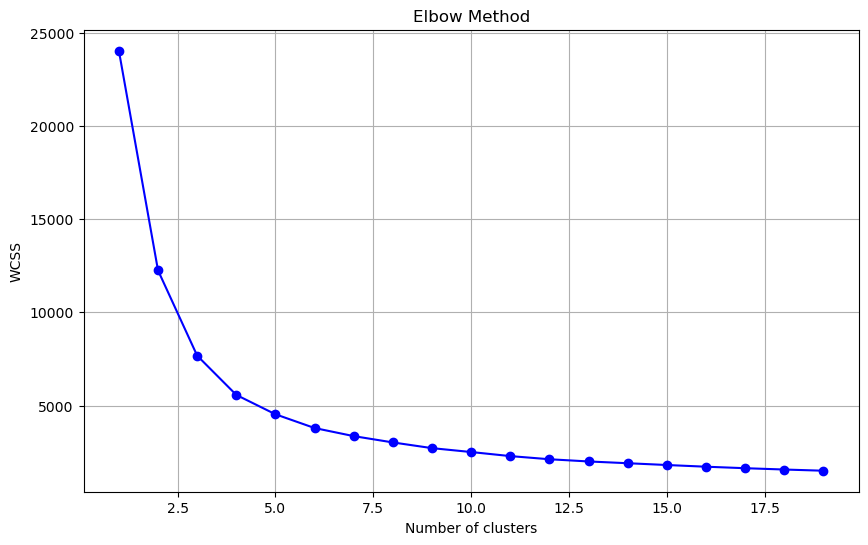

In [54]:
# 3. Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 20), wcss,  marker='o', linestyle='-', color='b')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [55]:
# Optional: Apply k-Means using the optimal number of clusters
optimal_clusters = 6 # This might change based on your actual elbow curve analysis
model = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)

## Train and Test the Model

In [56]:
# Fit the model on the training data
y_pred = model.fit_predict(X_scaled)

## Evaluating the Model 

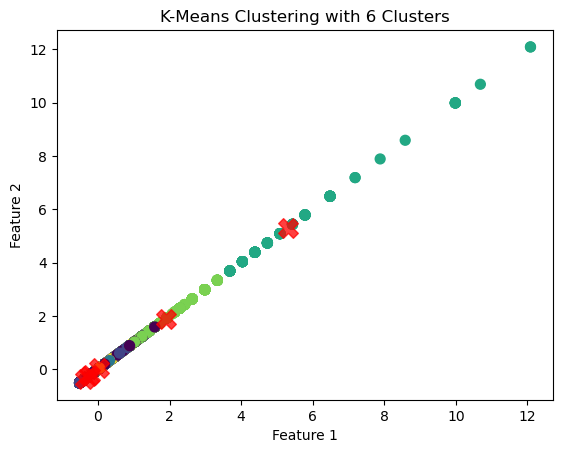

In [58]:
# Plotting the clusters with optimal number
plt.scatter(X_scaled[:, 2], X_scaled[:, 2], c=y_pred, s=50, cmap='viridis')

centers = model.cluster_centers_
plt.scatter(centers[:, 2], centers[:, 2], c='red', s=200, alpha=0.75, marker='X')
plt.title(f'K-Means Clustering with {optimal_clusters} Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [59]:
X['kmeans'] = y_pred

In [60]:
X['kmeans'].value_counts()

kmeans
1    2370
0    2049
5    1974
2     947
4     526
3     144
Name: count, dtype: int64

### DBSCAN


### praper data

In [89]:
# Prepare data
X = df_football


# sacle the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Bulding the model

In [90]:
# 2. Use NearestNeighbors to find the optimal eps
min_samples = 2

In [92]:
nn = NearestNeighbors(n_neighbors=min_samples)
nn.fit(X_scaled)
distances, indices = nn.kneighbors(X_scaled)

In [93]:
distances[:,min_samples-1]

array([7.95558264, 7.74060855, 2.53938619, ..., 2.73162814, 6.4373284 ,
       2.91179078])

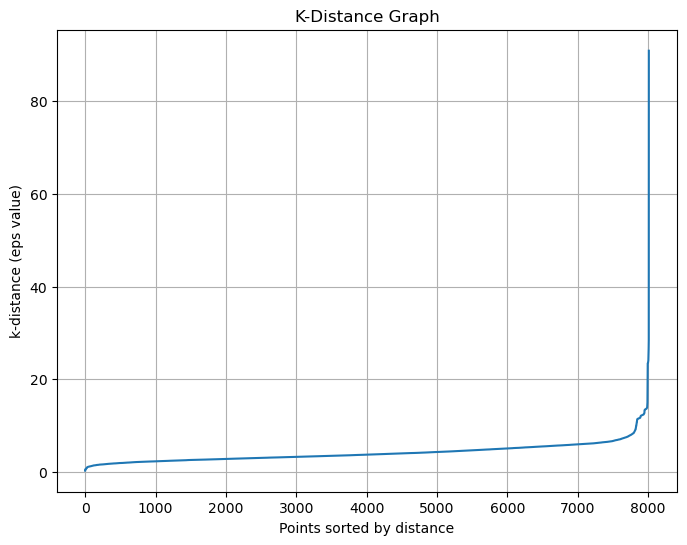

In [94]:
# The distance to the furthest neighbor (min_samples-th nearest) for each point
k_dist = distances[:, min_samples-1]

# Sort distances
k_dist_sorted = np.sort(k_dist)

# 3. Plotting the k-distance graph
plt.figure(figsize=(8, 6))
plt.plot(k_dist_sorted)
plt.title('K-Distance Graph')
plt.xlabel('Points sorted by distance')
plt.ylabel('k-distance (eps value)')
plt.grid(True)
plt.show()

In [96]:
 #4. Apply DBSCAN with chosen eps and min_samples
# Typically, you choose eps at the "elbow" point in this plot, where the slope changes significantly
chosen_eps = 10  # This is an example; choose this value based on the plot
dbscan = DBSCAN(eps=chosen_eps, min_samples=min_samples)

### Train The Model

In [97]:
clusters = dbscan.fit_predict(X_scaled)

In [98]:
pd.Series(clusters).value_counts()

-1      178
 8       33
 207     32
 225     32
 231     32
       ... 
 239      2
 191      2
 91       2
 183      2
 19       2
Name: count, Length: 400, dtype: int64

## Evaluating the Model 

In [99]:
silhouette_avg = silhouette_score(X, clusters)
silhouette_avg

-0.7543023304761606

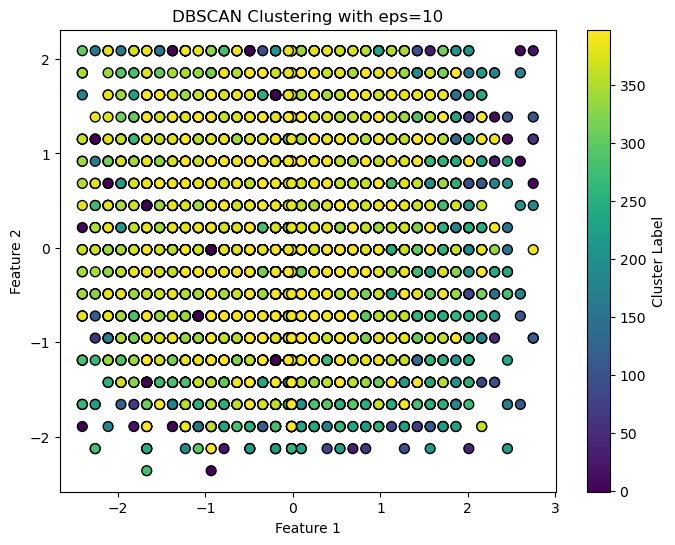

In [100]:
# 5. Plot the clustering result
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis', s=50, edgecolor='k')
plt.title(f'DBSCAN Clustering with eps={chosen_eps}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster Label')
plt.show()